In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

%matplotlib inline

In [176]:
import matplotlib as PLT
PLT.rcParams.update({'figure.max_open_warning': 0})
PLT.rcParams.update({'font.size': 15})

PLT.rcParams['axes.linewidth'] = 2

PLT.rcParams['xtick.major.size'] = 3
PLT.rcParams['xtick.major.width'] = 2

PLT.rcParams['ytick.major.size'] = 3
PLT.rcParams['ytick.major.width'] = 2

In [177]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/DataTrans_1/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/DataTrans/'

In [178]:
braindata=pd.read_csv(path+'proteins_SZL.csv',index_col=0)
brainsamples=pd.read_csv(path+'proteins_samples_SZL.csv',index_col=0)

In [179]:
blooddata=pd.read_csv(path+'blooddf.csv',index_col=0)
bloodsamples=pd.read_csv(path+'bloodsamples.csv',index_col=0)

## "variability": features, samples
## normalization, standardization

<AxesSubplot:ylabel='ID'>

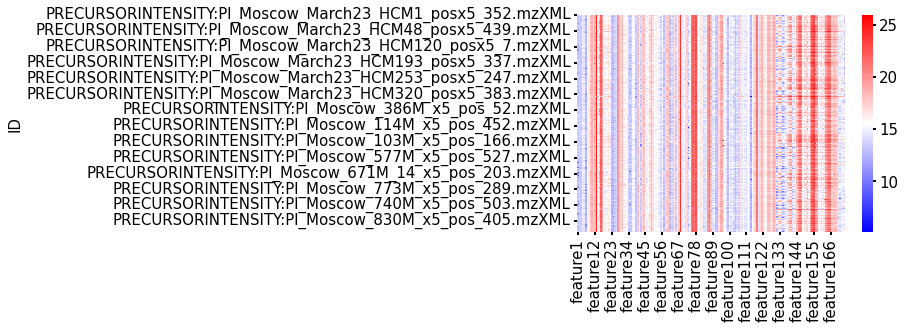

In [188]:
sns.heatmap(np.log2(blooddata),cmap='bwr')

<AxesSubplot:>

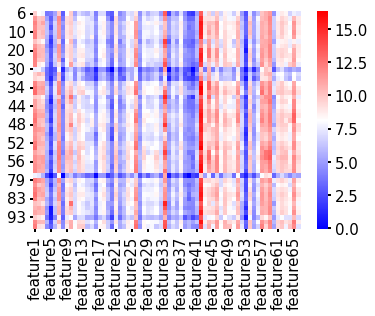

In [189]:
sns.heatmap(np.log2(braindata),cmap='bwr')

what do you see?

## features, ex. blood data

In [190]:
df=np.log2(blooddata)

In [191]:
df.mean().head()

feature1    13.111096
feature2    13.584800
feature3    13.401719
feature4    14.696190
feature5    14.495601
dtype: float64

In [192]:
dfcenter=df-df.mean()
dfZ=(df-df.mean())/df.std()

<AxesSubplot:ylabel='ID'>

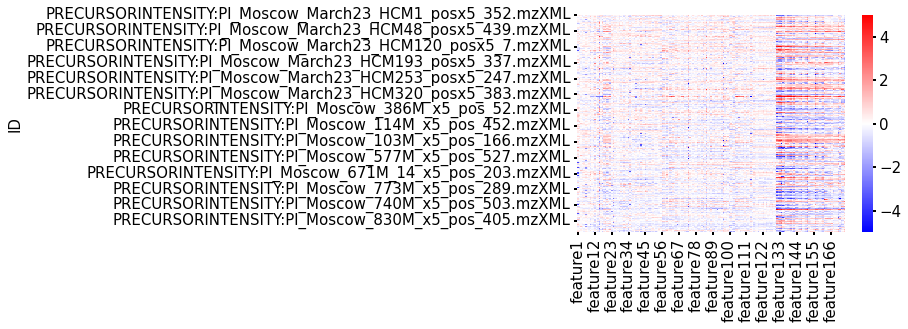

In [193]:
sns.heatmap(dfcenter,cmap='bwr',center=0,vmin=-5,vmax=5)

<AxesSubplot:ylabel='ID'>

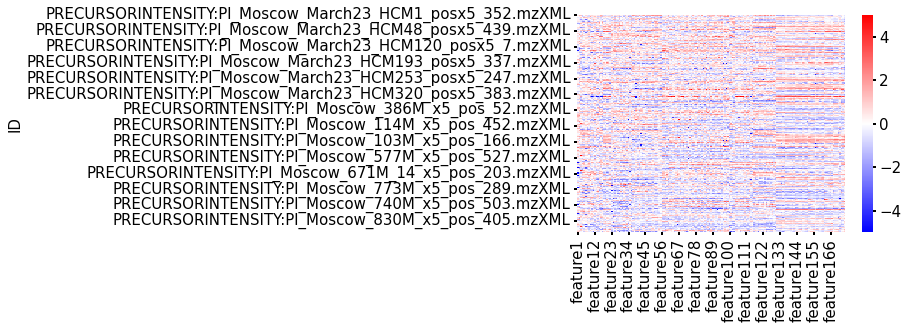

In [194]:
sns.heatmap(dfZ,cmap='bwr',center=0,vmin=-5,vmax=5)

what do you see?

"assumption" in this data for analysis?

## samples, ex. brain data

In [195]:
df=np.log2(braindata)

<AxesSubplot:>

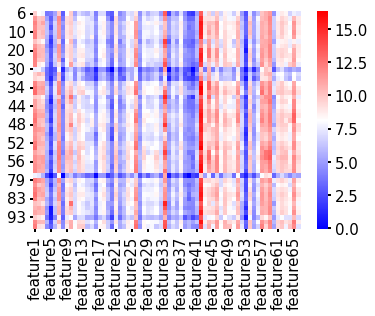

In [196]:
sns.heatmap(df,cmap='bwr')

In [197]:
dfnorm=(df.T-df.mean(axis=1)).T

<AxesSubplot:>

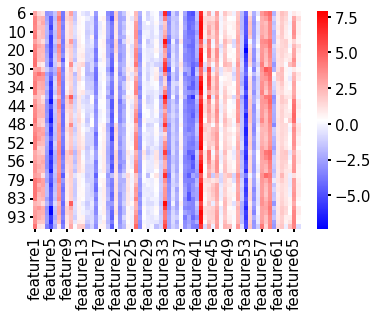

In [198]:
sns.heatmap(dfnorm,cmap='bwr')

Text(0, 0.5, 'distribution of protein levels')

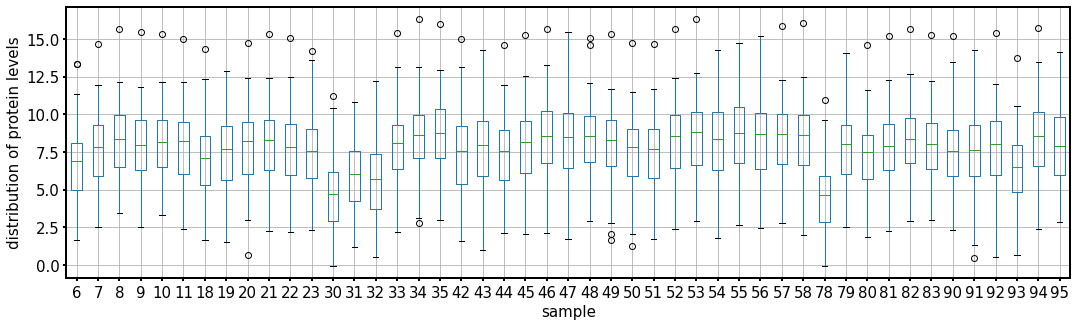

In [199]:
fig=plt.figure(figsize=(18,5))
df.T.boxplot()
plt.xlabel('sample')
plt.ylabel('distribution of protein levels')

## assumption:
the distribution of protein levels is the same for all samples

## method: 
substract the mean protein level

Text(0, 0.5, 'distribution of protein levels')

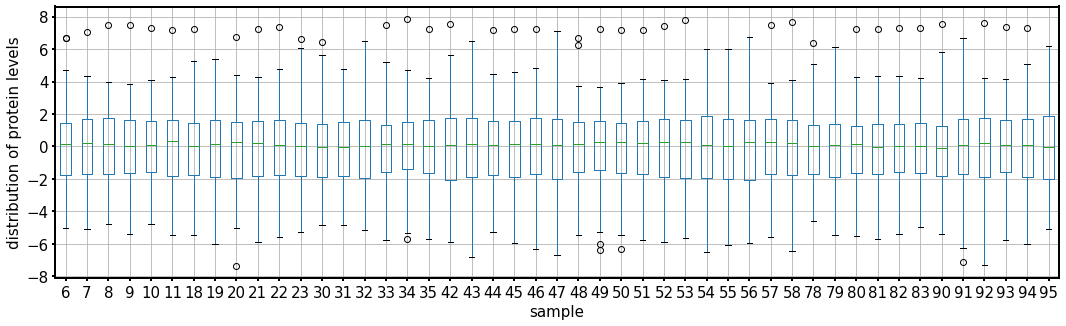

In [200]:
fig=plt.figure(figsize=(18,5))
dfnorm.T.boxplot()
plt.xlabel('sample')
plt.ylabel('distribution of protein levels')

## other methods? 

((1)remove median (2)add constant to keep levels (3) divide by mean value )

## Q 
does the assumption necessarily hold?

Text(0, 0.5, 'distribution of protein levels')

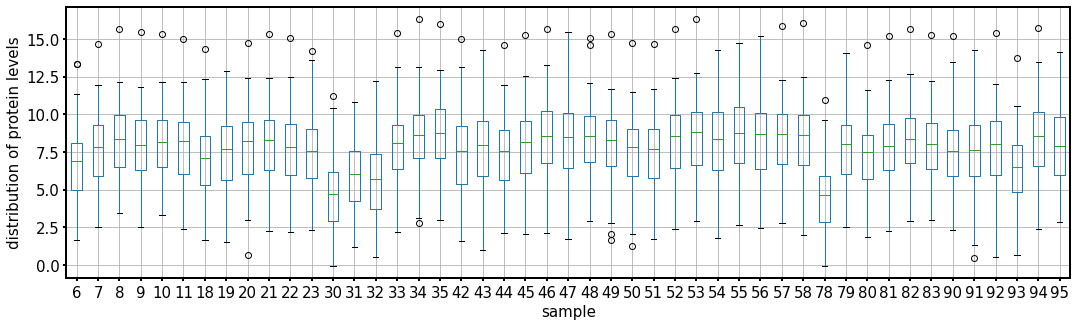

In [201]:
fig=plt.figure(figsize=(18,5))
df.T.boxplot()
plt.xlabel('sample')
plt.ylabel('distribution of protein levels')

In [202]:
dfnorm_wrong=(df.T/df.mean(axis=1)).T

Text(0, 0.5, 'distribution of protein levels')

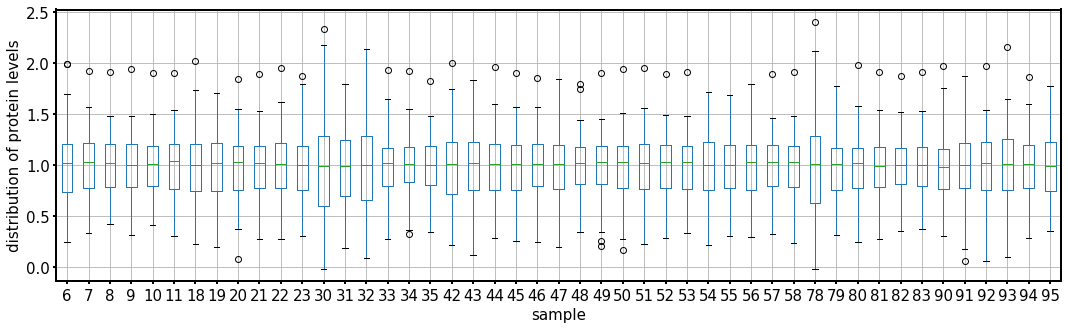

In [203]:
fig=plt.figure(figsize=(18,5))
dfnorm_wrong.T.boxplot()
plt.xlabel('sample')
plt.ylabel('distribution of protein levels')

also: about log scale, substraction and division

## original scale:

<AxesSubplot:>

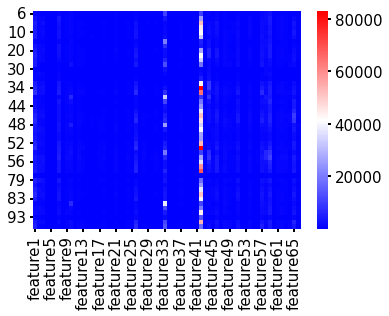

In [205]:
sns.heatmap(braindata,cmap='bwr')

<AxesSubplot:ylabel='ID'>

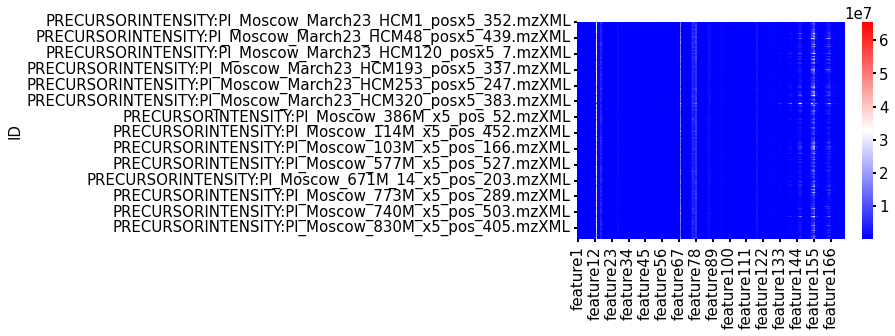

In [206]:
sns.heatmap(blooddata,cmap='bwr')

## variability

    -technical 
    -biological
    -from scale (log normal distribution)
    
    
    how to remove each one?

In [249]:
df=blooddata

#df=np.log2(df)

Text(0, 0.5, 'variance')

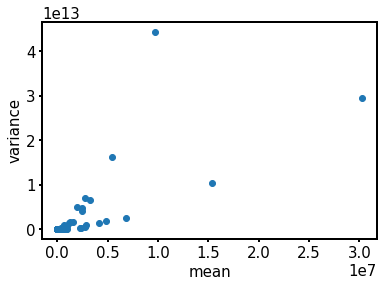

In [250]:
plt.scatter(df.mean(), df.var())
plt.xlabel('mean')
plt.ylabel('variance')

normalization: removes variability between samples (both biol. and techn.)

standardization: unifies varability between features (both biol. and techn.)

log-transformation: produces normal data (in the case of lognormal distribution) + naturally unifies variabilities 

## log transformation

- Properties of log

- log2FC, specific values

- Calculate examples in data

## PCA and standardization

In [254]:
df=np.log2(blooddata)

In [255]:
dfcenter=df-df.mean()
dfZ=(df-df.mean())/df.std()

In [256]:
X=df
#X=dfZ

In [257]:
#PCA method centers by default, so it's the same for df and dfcenter
model=PCA(n_components=4).fit(X)
dfPCA=pd.DataFrame(model.transform(X),index=X.index,columns=['PC1','PC2','PC3','PC4'])

In [258]:
indf=bloodsamples[bloodsamples['sex']=='f'].index
indm=bloodsamples[bloodsamples['sex']=='m'].index

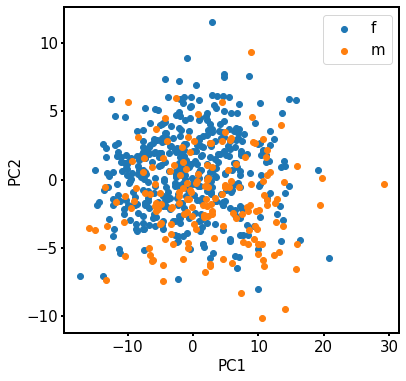

In [259]:
fig=plt.figure(figsize=(6,6))
plt.scatter(dfPCA.loc[indf,'PC1'], dfPCA.loc[indf,'PC2'],label='f') 
plt.scatter(dfPCA.loc[indm,'PC1'], dfPCA.loc[indm,'PC2'],label='m') 

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


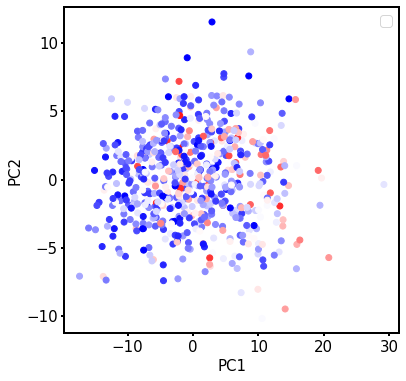

In [236]:
fig=plt.figure(figsize=(6,6))
plt.scatter(dfPCA.loc[:,'PC1'], dfPCA.loc[:,'PC2'],c=np.log2(bloodsamples['age']),cmap='bwr') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

In [237]:
components=pd.Series(model.components_[0], index=df.columns)

Text(0, 0.5, 'feature variance')

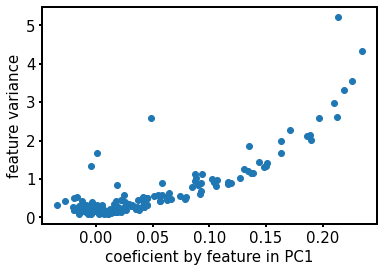

In [238]:
plt.scatter(components,X.var())
plt.xlabel('coeficient by feature in PC1')
plt.ylabel('feature variance')

<AxesSubplot:ylabel='ID'>

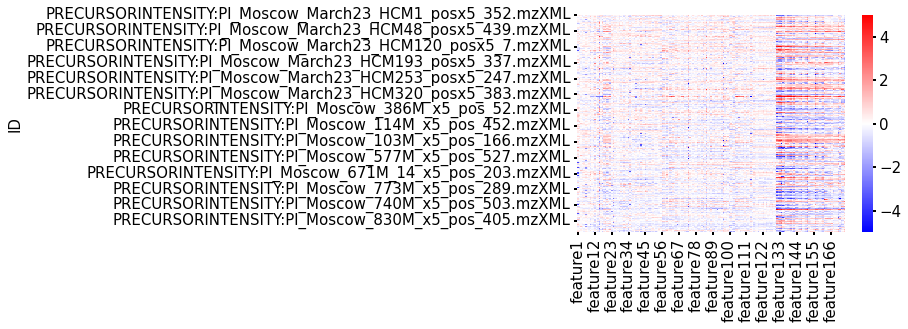

In [239]:
sns.heatmap(dfcenter,cmap='bwr',center=0,vmin=-5,vmax=5)

<AxesSubplot:ylabel='ID'>

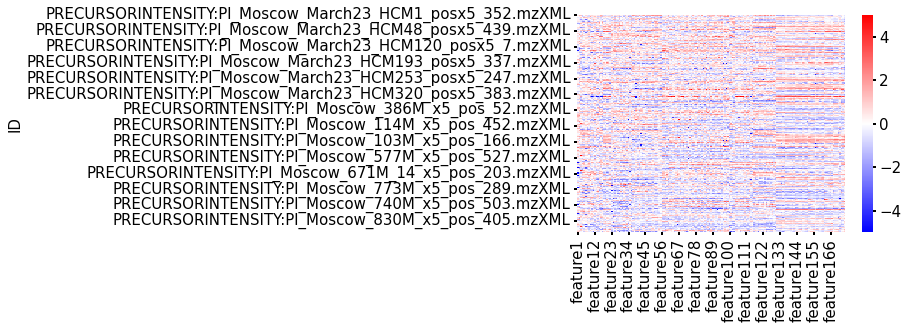

In [240]:
sns.heatmap(dfZ,cmap='bwr',center=0,vmin=-5,vmax=5)

## Q:

yes or no?

other data

In [241]:
data=pd.read_csv(path+'somescales_dementia.csv',index_col=0)

<AxesSubplot:>

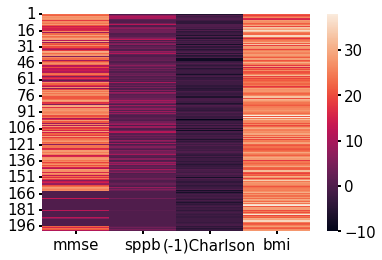

In [242]:
sns.heatmap(data)

In [246]:
data.max()

mmse            30.00
sppb            12.00
(-1)Charlson     0.00
bmi             37.95
dtype: float64

In [244]:
data.std()

mmse            9.488569
sppb            3.295055
(-1)Charlson    1.899061
bmi             4.444876
dtype: float64

In [247]:
#df=data-data.mean())
#df=(data-data.mean())/data.std()
#sns.heatmap(df,cmap='bwr')

In [248]:
#clustering of both features and samples..

## Standardization does not solve issue with log-normal data:

In [252]:
df=blooddata
dfZ=(df-df.mean())/df.std()

X=dfZ
model=PCA(n_components=4).fit(X)
dfPCA=pd.DataFrame(model.transform(X),index=X.index,columns=['PC1','PC2','PC3','PC4'])

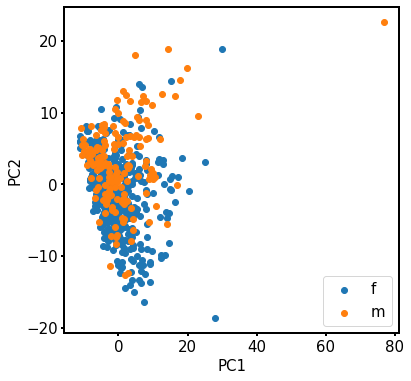

In [253]:
fig=plt.figure(figsize=(6,6))
plt.scatter(dfPCA.loc[indf,'PC1'], dfPCA.loc[indf,'PC2'],label='f') 
plt.scatter(dfPCA.loc[indm,'PC1'], dfPCA.loc[indm,'PC2'],label='m') 

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

## Biological variation and statistical analysis

In [261]:
df=np.log2(blooddata)

In [262]:
pv=pd.Series(ttest_ind(df.loc[indf],df.loc[indm],equal_var=False)[1],index=df.columns)
FC=df.loc[indf].mean()-df.loc[indm].mean()

In [268]:
2**0.5

1.4142135623730951

Text(0, 0.5, '-log10 p-value')

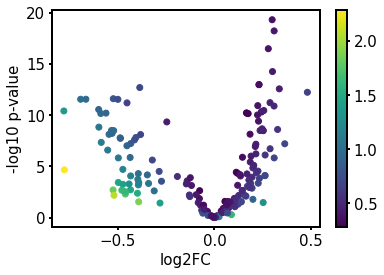

In [265]:
plt.scatter(FC,-np.log10(pv),c=df.std())
plt.colorbar()
plt.xlabel('log2FC')
plt.ylabel('-log10 p-value')

can you explain high fold change, low p-value? (lighter points)

In [269]:
i=df.var().idxmin()
j=df.var().idxmax()

In [274]:
2**0.11

1.0792282365044272

In [275]:
2**0.77

1.7052697835359134

In [270]:
FC[i], FC[j]

(0.11314883061874781, -0.7785798094730794)

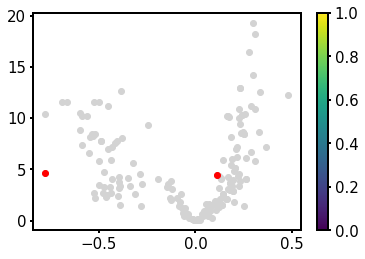

In [273]:
plt.scatter(FC,-np.log10(pv),color='lightgrey')
plt.scatter(FC[j],-np.log10(pv[j]),color='red')
plt.scatter(FC[i],-np.log10(pv[i]),color='red')
plt.colorbar()

(15.0, 24.0)

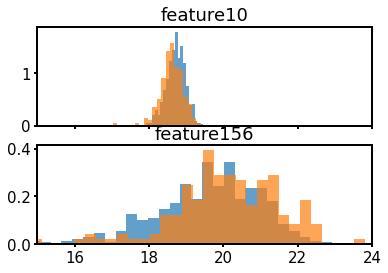

In [276]:
fig, (ax1,ax2)=plt.subplots(2,1,sharex=True)
ax1.hist(df.loc[indf,i],alpha=0.7,density=True,bins=20)
ax1.hist(df.loc[indm,i],alpha=0.7,density=True,bins=20)
ax1.set_title(i)
ax2.hist(df.loc[indf,j],alpha=0.7,density=True,bins=50)
ax2.hist(df.loc[indm,j],alpha=0.7,density=True,bins=50)
ax2.set_title(j)

ax2.set_xlim([15,24])

## Q 

is feature j more important than i in terms of differences between mean and women (shoul you filter significant features by FC)?

is feature j more important than i if you want to show total variance in the data (PCA anlaysis)?

## sample normalization, PCA brain data

In [279]:
df=np.log2(braindata)
dfnorm=(df.T-df.mean(axis=1)).T

Text(0, 0.5, 'distribution of protein levels')

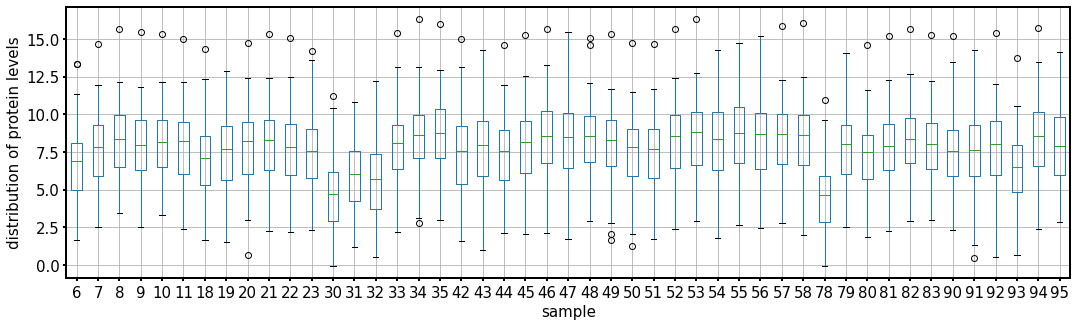

In [280]:
fig=plt.figure(figsize=(18,5))
df.T.boxplot()
plt.xlabel('sample')
plt.ylabel('distribution of protein levels')

Text(0, 0.5, 'distribution of protein levels')

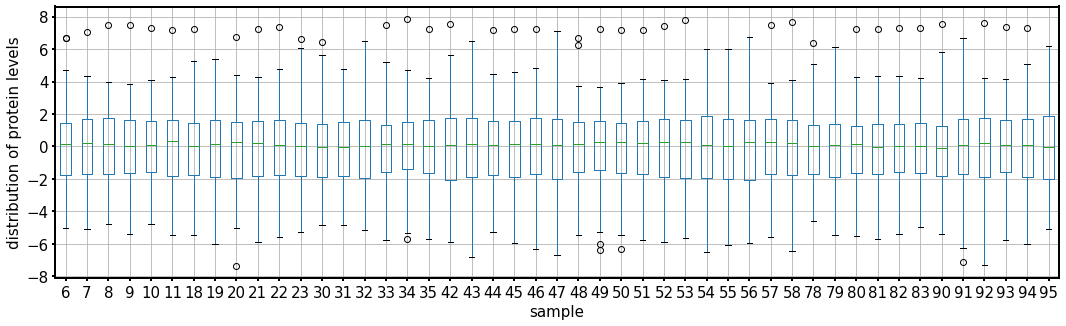

In [281]:
fig=plt.figure(figsize=(18,5))
dfnorm.T.boxplot()
plt.xlabel('sample')
plt.ylabel('distribution of protein levels')

In [282]:
X=df
model=PCA(n_components=4).fit(X)
dfPCA=pd.DataFrame(model.transform(X),index=X.index,columns=['PC1','PC2','PC3','PC4'])

Text(0, 0.5, 'PC2')

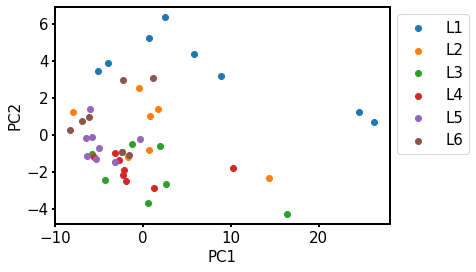

In [283]:
for k in brainsamples['Layer'].unique():
    ind=brainsamples[brainsamples['Layer']==k].index
    plt.scatter(dfPCA.loc[ind,'PC1'],dfPCA.loc[ind,'PC2'],label=k)

plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')

In [284]:
X=dfnorm
model=PCA(n_components=4).fit(X)
dfPCA=pd.DataFrame(model.transform(X),index=X.index,columns=['PC1','PC2','PC3','PC4'])

Text(0, 0.5, 'PC2')

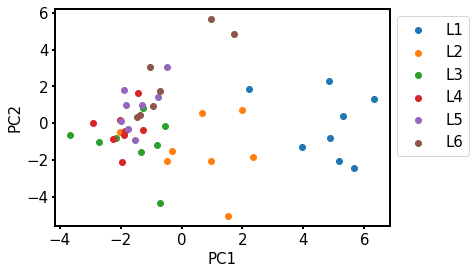

In [286]:
for k in brainsamples['Layer'].unique():
    ind=brainsamples[brainsamples['Layer']==k].index
    plt.scatter(dfPCA.loc[ind,'PC1'],dfPCA.loc[ind,'PC2'],label=k)

plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')

## sample normalization, statistical analysis blood data

In [287]:
df=np.log2(blooddata)
dfnorm=(df.T-df.mean(axis=1)).T + df.mean(axis=1).mean()

([], [])

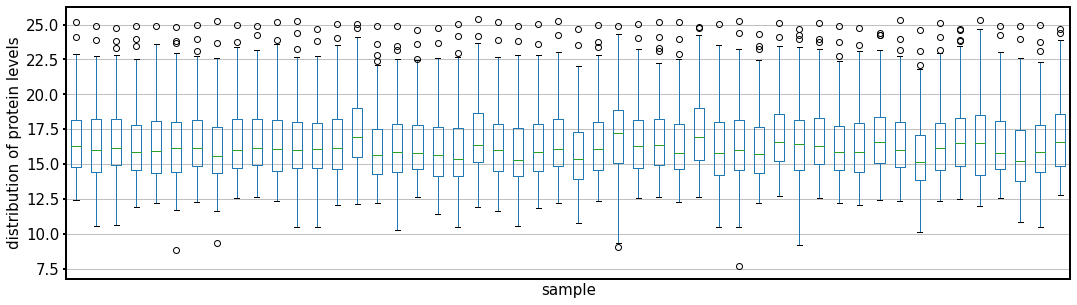

In [288]:
#first 50 samples
fig=plt.figure(figsize=(18,5))
df.iloc[:50].T.boxplot()
plt.xlabel('sample')
plt.ylabel('distribution of protein levels')
plt.xticks([])

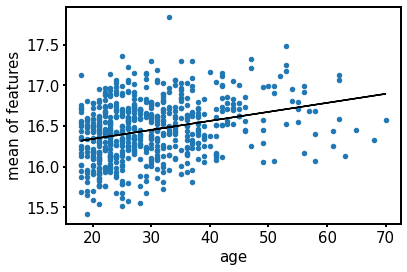

In [290]:
plt.scatter(bloodsamples['age'],df.mean(axis=1),s=20)
plt.xlabel('age')
plt.ylabel('mean of features')

x=bloodsamples['age']
y=df.mean(axis=1)
lr=LinearRegression()
beta=lr.fit(pd.DataFrame(x),y).coef_
interc=lr.fit(pd.DataFrame(x),y).intercept_
plt.plot(x,beta*x+interc,color='black')

In [291]:
pearsonr(bloodsamples['age'],df.mean(axis=1))

(0.2908242919448436, 3.081653560225997e-13)

<AxesSubplot:ylabel='ID'>

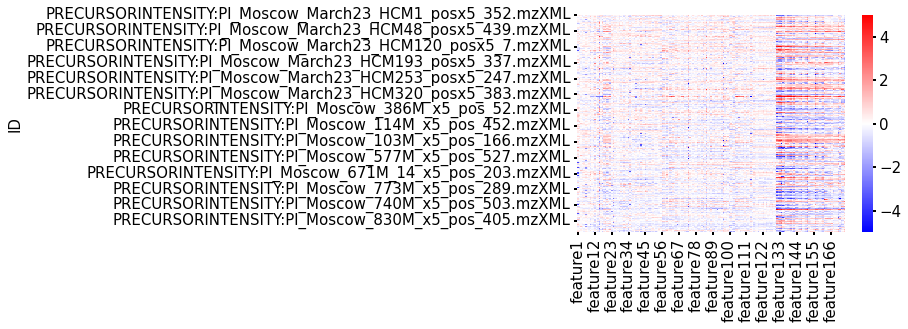

In [292]:
dfcenter=df-df.mean()
sns.heatmap(dfcenter,cmap='bwr',center=0,vmin=-5,vmax=5)

What features contibutes most to sample mean?

In [293]:
c=pd.Series(index=df.columns,dtype=float)
for i in df.columns:
    c[i]=pearsonr(df[i],df.mean(axis=1))[0]

Text(0, 0.5, 'correlation to sample mean')

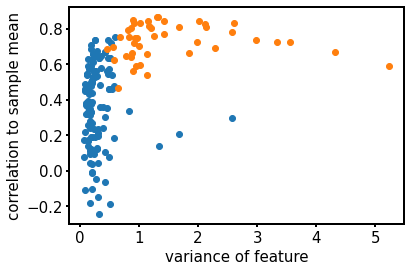

In [294]:
cols1=df.columns[:130]
cols2=df.columns[130:]
plt.scatter(df[cols1].var(),c[cols1])
plt.scatter(df[cols2].var(),c[cols2])
plt.xlabel('variance of feature')
plt.ylabel('correlation to sample mean')

old vs young samples

In [295]:
indold=bloodsamples[bloodsamples['age']>50].index
indyoung=bloodsamples[bloodsamples['age']<25].index

In [296]:
pv=pd.Series(ttest_ind(df.loc[indold],df.loc[indyoung],equal_var=False)[1],index=df.columns)
FC=df.loc[indold].mean()-df.loc[indyoung].mean()

Text(0, 0.5, '- log10 p0value')

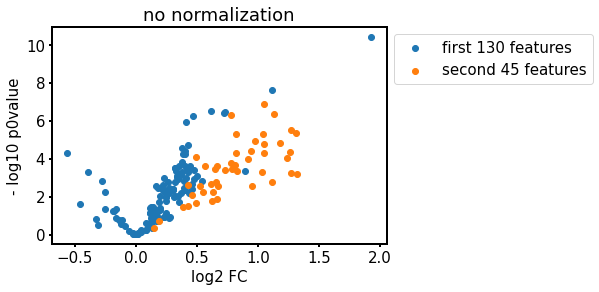

In [297]:
plt.title('no normalization')
plt.scatter(FC[cols1],-np.log10(pv[cols1]),label='first 130 features')
plt.scatter(FC[cols2],-np.log10(pv[cols2]),label='second 45 features')
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel('log2 FC')
plt.ylabel('- log10 p0value')

In [299]:
pv=pd.Series(ttest_ind(dfnorm.loc[indold],dfnorm.loc[indyoung],equal_var=False)[1],index=df.columns)
FC=dfnorm.loc[indold].mean()-dfnorm.loc[indyoung].mean()

Text(0, 0.5, '- log10 p0value')

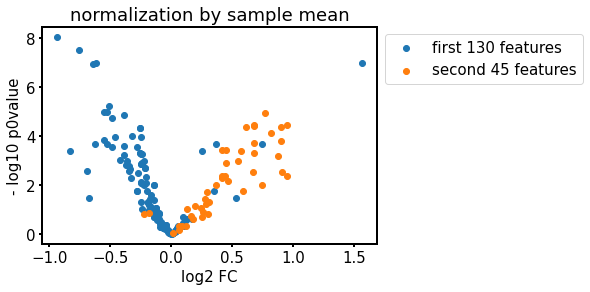

In [300]:
plt.title('normalization by sample mean')
plt.scatter(FC[cols1],-np.log10(pv[cols1]),label='first 130 features')
plt.scatter(FC[cols2],-np.log10(pv[cols2]),label='second 45 features')

plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('log2 FC')
plt.ylabel('- log10 p0value')

what is happening?

Text(0.5, 0.98, 'no normalization')

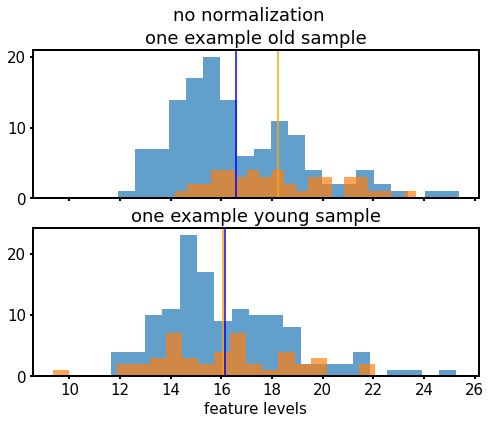

In [301]:



fig, (ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(8,6))
ax1.hist(df.loc[indold[0],cols1],bins=20,alpha=0.7)
ax1.hist(df.loc[indold[0],cols2],bins=20,alpha=0.7)
ax1.axvline(np.mean(df.loc[indold[0],cols1]),color='blue')
ax1.axvline(np.mean(df.loc[indold[0],cols2]),color='orange')
ax1.set_title('one example old sample')

ax2.hist(df.loc[indyoung[0],cols1],bins=20,alpha=0.7)
ax2.hist(df.loc[indyoung[0],cols2],bins=20,alpha=0.7)
ax2.axvline(np.mean(df.loc[indyoung[0],cols1]),color='blue')
ax2.axvline(np.mean(df.loc[indyoung[0],cols2]),color='orange')
ax2.set_title('one example young sample')
ax2.set_xlabel('feature levels')
fig.suptitle('no normalization')

In [67]:
"""
fig=plt.figure(figsize=(4,4))
plt.scatter(df.loc[indyoung[0],cols1],df.loc[indold[0],cols1])
plt.scatter(df.loc[indyoung[0],cols2],df.loc[indold[0],cols2])
plt.plot([12,25],[12,25],color='black')
plt.title('no normalization')
plt.xlabel('one young sample')
plt.ylabel('one old sample')
"""

"\nfig=plt.figure(figsize=(4,4))\nplt.scatter(df.loc[indyoung[0],cols1],df.loc[indold[0],cols1])\nplt.scatter(df.loc[indyoung[0],cols2],df.loc[indold[0],cols2])\nplt.plot([12,25],[12,25],color='black')\nplt.title('no normalization')\nplt.xlabel('one young sample')\nplt.ylabel('one old sample')\n"

In [68]:
"""
fig=plt.figure(figsize=(4,4))
plt.scatter(dfnorm.loc[indyoung[0],cols1],dfnorm.loc[indold[0],cols1])
plt.scatter(dfnorm.loc[indyoung[0],cols2],dfnorm.loc[indold[0],cols2])
plt.plot([12,25],[12,25],color='black')
plt.title('normalization by sample mean')
plt.xlabel('one young sample')
plt.ylabel('one old sample')
"""

"\nfig=plt.figure(figsize=(4,4))\nplt.scatter(dfnorm.loc[indyoung[0],cols1],dfnorm.loc[indold[0],cols1])\nplt.scatter(dfnorm.loc[indyoung[0],cols2],dfnorm.loc[indold[0],cols2])\nplt.plot([12,25],[12,25],color='black')\nplt.title('normalization by sample mean')\nplt.xlabel('one young sample')\nplt.ylabel('one old sample')\n"

what are the biological conlcusions of the study?

## summary: technical vs biological variability

## Predictive modelling

age vs bmi

Text(0, 0.5, 'bmi')

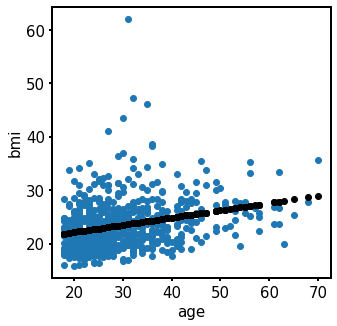

In [302]:
fig=plt.figure(figsize=(5,5))

x=bloodsamples['age']
y=bloodsamples['bmi']

lr=LinearRegression()
lr.fit(pd.DataFrame(x),y)
pred=lr.predict(pd.DataFrame(x))
#beta=lr.fit(pd.DataFrame(x),y).coef_
#interc=lr.fit(pd.DataFrame(x),y).intercept_

plt.scatter(x,y)
plt.scatter(x,pred,color='black')
plt.xlabel('age')
plt.ylabel('bmi')

In [303]:
pearsonr(x,y)[0], pearsonr(x,y)[0]**2

(0.2779942582122766, 0.0772808075989939)

## Coefficient of determination R2


RSS=residual sum of squares 

TSS=total sum of squares 

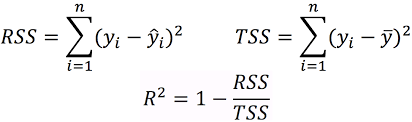

In [305]:
r2_score(y,pred)

0.07728080759899392

all lipids

Text(0, 0.5, 'prediction')

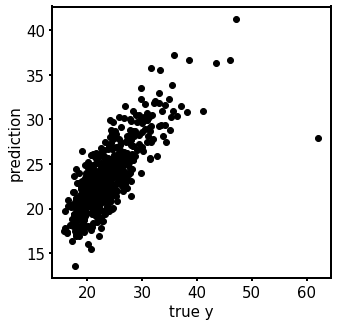

In [306]:
fig=plt.figure(figsize=(5,5))

X=np.log2(blooddata)
y=bloodsamples['bmi']

lr=LinearRegression()
lr.fit(X,y)
pred=lr.predict(X)


plt.scatter(y,pred,color='black')
plt.xlabel('true y')
plt.ylabel('prediction')

In [308]:
#pearsonr(y,pred)[0],pearsonr(y,pred)[0]**2

In [307]:
r2_score(y,pred)

0.624220084078962

what is wrong with this approach?

-CV

-subsmpling

In [310]:
X.shape

(604, 175)

Text(0, 0.5, 'prediction')

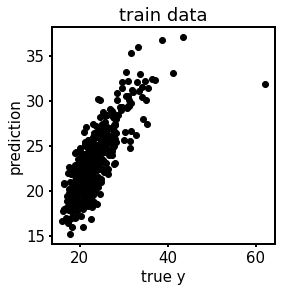

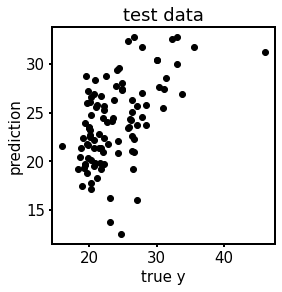

In [336]:
X=np.log2(blooddata)
y=bloodsamples['bmi']

train,test=train_test_split(X.index,test_size=100,train_size=400)

lr=LinearRegression()
lr.fit(X.loc[train],y[train])
predtrain=lr.predict(X.loc[train])
predtest=lr.predict(X.loc[test])

fig=plt.figure(figsize=(4,4))
plt.title('train data')
plt.scatter(y[train],predtrain,color='black')
plt.xlabel('true y')
plt.ylabel('prediction')


fig=plt.figure(figsize=(4,4))
plt.title('test data')
plt.scatter(y[test],predtest,color='black')
plt.xlabel('true y')
plt.ylabel('prediction')

In [337]:
r2_score(y[train],predtrain)

0.6428960468275625

In [338]:
r2_score(y[test],predtest)

0.12095275720361676

In [326]:
[i for i in train if i in test]

[]

In [79]:
kf=KFold(n_splits=5)
for train, test in kf.split(X):
    print(len(train),len(test))
    #print(test)

483 121
483 121
483 121
483 121
484 120


0.2527262700778552
0.19083435118247227
0.2097792746757018
0.23955964211630387
0.22396830414432356


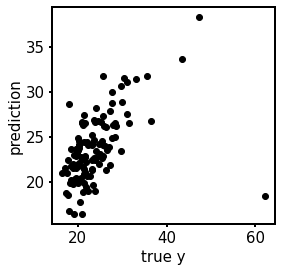

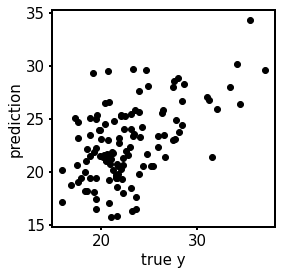

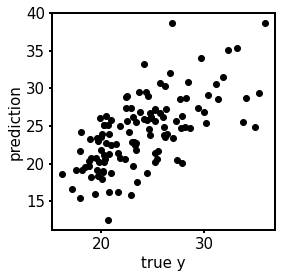

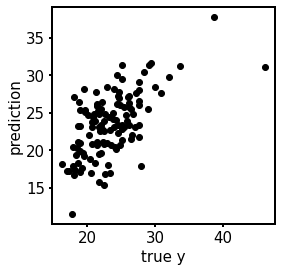

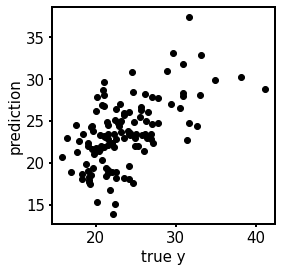

In [339]:
X=np.log2(blooddata)
y=bloodsamples['bmi']
IND=X.index
kf=KFold(n_splits=5,shuffle=True)

for train, test in kf.split(X):
    
    lr=LinearRegression()
    lr.fit(X.loc[IND[train]],y[IND[train]])
    predtrain=lr.predict(X.loc[IND[train]])
    predtest=lr.predict(X.loc[IND[test]])
    
    fig=plt.figure(figsize=(4,4))
    plt.scatter(y[IND[test]],predtest,color='black')
    plt.xlabel('true y')
    plt.ylabel('prediction')
    print(r2_score(y[IND[test]],predtest))

## what about binary target variable?

In [340]:
bloodsamples.loc[bloodsamples['sex']=='f','sex binary']=1
bloodsamples.loc[bloodsamples['sex']=='m','sex binary']=0

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


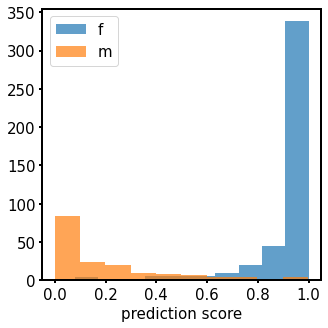

In [342]:
fig=plt.figure(figsize=(5,5))

X=np.log2(blooddata)
y=bloodsamples['sex binary']

lr=LogisticRegression()
lr.fit(X,y)
pred=lr.predict_proba(X)[:,1]


plt.hist(pred[y==1],alpha=0.7,label='f')
plt.hist(pred[y==0],alpha=0.7,label='m')
plt.xlabel('prediction score')
plt.legend()

what is wrong with this approach?

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


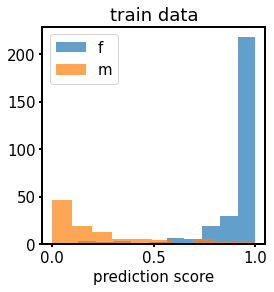

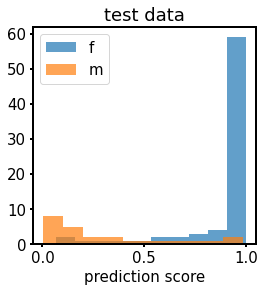

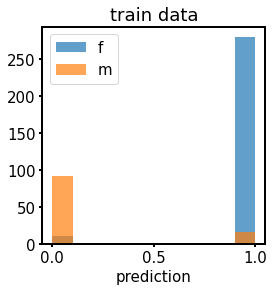

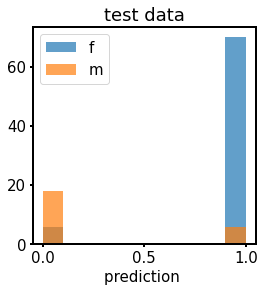

In [346]:
X=np.log2(blooddata)
y=bloodsamples['sex binary']

train,test=train_test_split(X.index,test_size=100,train_size=400)


lr=LogisticRegression()
lr.fit(X.loc[train],y[train])

predtrain=lr.predict_proba(X.loc[train])[:,1]
predtest=lr.predict_proba(X.loc[test])[:,1]

fig=plt.figure(figsize=(4,4))
plt.title('train data')
plt.hist(predtrain[y[train]==1],alpha=0.7,label='f')
plt.hist(predtrain[y[train]==0],alpha=0.7,label='m')
plt.xlabel('prediction score')
plt.legend()


fig=plt.figure(figsize=(4,4))
plt.title('test data')
plt.hist(predtest[y[test]==1],alpha=0.7,label='f')
plt.hist(predtest[y[test]==0],alpha=0.7,label='m')
plt.xlabel('prediction score')
plt.legend()




predtrain=lr.predict(X.loc[train])
predtest=lr.predict(X.loc[test])


fig=plt.figure(figsize=(4,4))
plt.title('train data')
plt.hist(predtrain[y[train]==1],alpha=0.7,label='f')
plt.hist(predtrain[y[train]==0],alpha=0.7,label='m')
plt.xlabel('prediction')
plt.legend()


fig=plt.figure(figsize=(4,4))
plt.title('test data')
plt.hist(predtest[y[test]==1],alpha=0.7,label='f')
plt.hist(predtest[y[test]==0],alpha=0.7,label='m')
plt.xlabel('prediction ')
plt.legend()


 metrics

-accuracy

-sensitivity (proportion of 1 cases predicted as 1, TPR)

-specificity (proportion 0 cases predicted as 0, TNR )

-Area under the ROC Curve (TPR vs the FPR = 1-TNR)


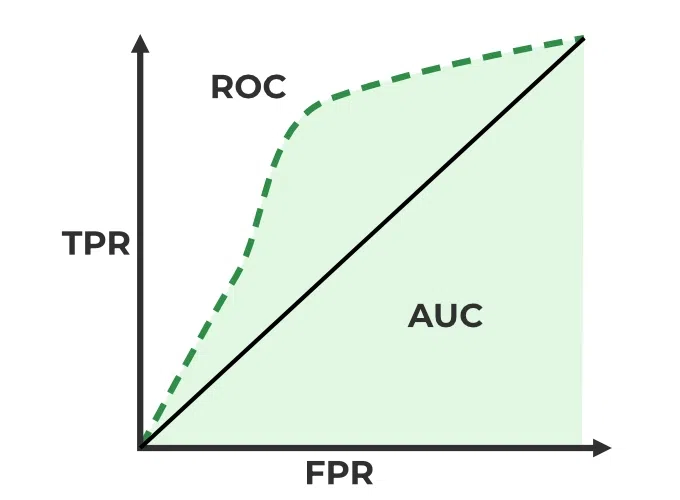

In [88]:
#next topics:
#correlate features in linear models, regularization
#small sample sizes, varibaility in predictions, basic rule of feature selection